<b>
<p>
<center>
<font size="5">
DATS6202: Introduction to Machine Learning
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Human Action Recognition Using Convolutional Neural Network
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Group 18 : Bhumika Mallikarjun Horapet, Swathi Murali Srinivasan, Nema Puthanveetil
</font>
</center>
</p>
</b>


(The link to the video recording of our presentation has been included in the final section of this report.)

# Introduction

## Project Overview
This project focuses on Human Action Recognition (HAR), which aims to understand human behavior and accurately classify it into predefined categories. HAR has broad applications across various fields, such as security, health monitoring, and interactive gaming. The task is to build an Image Classification Model using Convolutional Neural Networks (CNN) that can classify the type of human activity being performed in an image.

## About the Dataset
- **Size**: Contains about 12,000 labeled images, where each one is given one of 15 labels.
- **Classes**: The dataset features 15 different classes of human activities:
  - Sitting
  - Using Laptop
  - Hugging
  - Sleeping
  - Drinking
  - Clapping
  - Dancing
  - Cycling
  - Calling
  - Laughing
  - Eating
  - Fighting
  - Listening to Music
  - Running
  - Texting

## Problem Statement
Human actions can be represented using various data modalities, each encoding distinct and useful information applicable to different scenarios. The task is to leverage these modalities to develop a robust model capable of classifying human actions from images.


# Setup
Import necessary libraries and set up the environment for the project.

# Google drive configuration

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
# abspath_curr = '/content/drive/My Drive/DATS6202_FinalProject/'
abspath_curr = '/content/drive/My Drive/Colab Notebooks/DATS6202_FinalProject/' # I had to change the filepaths for me to run the file, we can switch depending on who is submitting the file - Nema

# Get the absolute path of the shallow utilities folder
# abspath_util_deep = '/content/drive/My Drive/DATS6202_FinalProject/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning/'
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/DATS6202_FinalProject/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning/'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Warning

In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

# Importing different libraries:

In [ ]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from PIL import Image
import seaborn as sns
import matplotlib.image as img
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder

# Matplotlib

In [ ]:

%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

# TensorFlow

In [ ]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


# Random Seed

In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)
np.random.seed(random_seed)

# Setting the Working Directory

In [ ]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/DATS6202_FinalProject/teaching/gwu/machine_learning_I/code/utilities/p3_deep_learning


# Data Loading and Preprocessing:
Here, we handle the loading and preprocessing of the image data.

## Data Loading:

Loading the csv files:

In [ ]:
# Load the csv file
df = pd.read_csv(abspath_curr + 'Training_set.csv')

Previewing the data:

In [ ]:
df

,filename,label
0,Image_1.jpg,sitting
1,Image_2.jpg,using_laptop
2,Image_3.jpg,hugging
3,Image_4.jpg,sleeping
4,Image_5.jpg,using_laptop
...,...,...
12595,Image_12596.jpg,sitting
12596,Image_12597.jpg,clapping
12597,Image_12598.jpg,sitting
12598,Image_12599.jpg,dancing


In [ ]:
df.label.value_counts()

label
sitting               840
using_laptop          840
hugging               840
sleeping              840
drinking              840
clapping              840
dancing               840
cycling               840
calling               840
laughing              840
eating                840
fighting              840
listening_to_music    840
running               840
texting               840
Name: count, dtype: int64

# Understanding the Dataset : Visualize the distribution of activities
- This section creates a pie chart to illustrate the proportion of each human
activity in the training data.
- The chart uses a red to blue sequential color scheme for clarity and visual distinction between activities.
- Text labels inside the chart display both the percentage and label of each activity category, offering an immediate understanding of the dataset's composition.


In [ ]:
# Pie chart visualizing distribution of activity classes
df_har = df['label'].value_counts().reset_index()
df_har.columns = ['action', 'Count']

fig = px.pie(df_har, values='Count', names='action', title='Distribution of Human Activity',
             color_discrete_sequence=px.colors.sequential.RdBu,
             hole=0.4,
             )


fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(
    title_text='Distribution of Human Activity',
    title_x=0.5,
    legend_title_text='Activity',
    legend=dict(
        title_font_family="Arial",
        title_font_color="black",
        traceorder="normal",
        font=dict(
            family="Courier",
            size=12,
            color="black"
        ),
        bgcolor="White",
        bordercolor="Black",
        borderwidth=2
    )
)


fig.show()

# Visualizing a Sample Activity Image

In this section, we randomly select and display an image from the training dataset to visualize one of the human activities. This step is important as it gives us a direct view of the data we're working with, which can be critical for understanding the input that will be fed into our model.

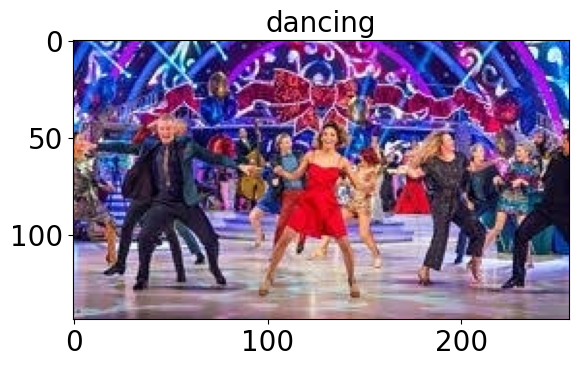

In [ ]:
# Randomly select an image number
num = random.randint(1,10000)
imgg = "Image_{}.jpg".format(num)

# Define the path to the images
df_path = abspath_curr + 'train/'
# Read the image file
testImage = img.imread(df_path + imgg)
# Display the image
plt.imshow(testImage)
# Set the title of the image to the activity label
plt.title("{}".format(df
.loc[df['filename'] == "{}".format(imgg), 'label'].item()))
# Display the image
plt.show()

# Data Preprocessing, TensorFlow Dataset Creation, and Splitting the Data

In this crucial phase, we prepare our data for the model training process. We begin by loading our CSV file which contains the metadata for our training set, including file paths and labels. The paths to the image files are constructed by appending the image filenames to the base directory path.

Next, we convert our file paths and labels into a TensorFlow Dataset. This specialized data structure efficiently handles large amounts of data, allows for complex transformations, and is optimized for machine learning models in TensorFlow. By using `tf.data.Dataset.from_tensor_slices`, we pair each file path with its corresponding label, creating a dataset ready for further preprocessing and model training.

Since the CNN model does not accept categorical labels, we convert our activities to numeric labels instead using the labelEncoder from the sklearn preprocessing library.

## Label Encoding

In [ ]:
# Load CSV data
df = pd.read_csv(os.path.join(abspath_curr, 'Training_set.csv')) # Need to load the data earlier - we should use the datasets from the EDA section

# Extract labels
labels = df['label']

# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(labels)

# Transform labels to numeric
numeric_labels = label_encoder.transform(labels)

# Add the numeric labels as a new column in the DataFrame
df['numeric_labels'] = numeric_labels

We see here what the dataset with the numeric labels appended as another column looks like:

In [ ]:
# Now, 'df' contains an additional column named 'numeric_labels' with encoded label values
print(df.head())  # Display the first few rows to confirm the new column

      filename         label  numeric_labels
0  Image_1.jpg       sitting              11
1  Image_2.jpg  using_laptop              14
2  Image_3.jpg       hugging               7
3  Image_4.jpg      sleeping              12
4  Image_5.jpg  using_laptop              14


We also create a dictionary mapping each string label to its corresponding numeric label, seen here:

In [ ]:
# Create a dictionary of label mappings for reference
labels_unique = list(set(labels))
label_dict = dict(zip(labels_unique, label_encoder.transform(list(labels_unique))))
label_dict

{'drinking': 4,
 'hugging': 7,
 'cycling': 2,
 'fighting': 6,
 'texting': 13,
 'calling': 0,
 'clapping': 1,
 'laughing': 8,
 'dancing': 3,
 'running': 10,
 'sitting': 11,
 'sleeping': 12,
 'listening_to_music': 9,
 'eating': 5,
 'using_laptop': 14}

## Tensor Flow Dataset

We then create the TensorFlow dataset of images:

In [ ]:
#  # Creating a list of the full filepath to each image after appending the current folder's path to the name of the image as included in the csv file
#  # Then we can use these filepaths to access each image
file_paths = df['filename'].apply(lambda x: os.path.join(abspath_curr, 'train', x)).tolist()


In [ ]:
# Create a TensorFlow dataset by creating a tuple for each image containing the image's metadata and it's corresponding label (which we've now made numeric)
full_dataset = tf.data.Dataset.from_tensor_slices((file_paths, numeric_labels))

In [ ]:
# Function to load and decode images
def load_and_decode_image(file_path, numeric_labels):
    img_raw = tf.io.read_file(file_path)   # Load the raw data from the file
    img = tf.image.decode_jpeg(img_raw, channels=3)    # Decode it into a tensor
    return img, numeric_labels

# Apply the function to decode each tensorflow image
full_dataset = full_dataset.map(load_and_decode_image)

## Splitting the Dataset into Train, Validation, Test

Now that we have our full dataset, we can split it into training, validation, and testing subsets. To do this, we first define the set sizes:

In [ ]:
# Calculate the number of items in each split
first_train_size = int(0.80 * len(file_paths))
test_size = len(file_paths) - first_train_size
val_size = int(0.30 * first_train_size)
train_size = first_train_size-val_size

Next we apply the sizes to the TensorFlow dataset and split them into the subsets:

In [ ]:
# Split the dataset
train_dataset = full_dataset.take(train_size)
remaining_dataset = full_dataset.skip(train_size)
validation_dataset = remaining_dataset.take(val_size)
test_dataset = remaining_dataset.skip(val_size)

## Resizing the Data

Notice that the datasets are TensorFlow objects and each tuple currently has an image with undefined shape, 3 channels (since we have colored RGB images) and its corresponding label. To define the shape of the image, we resize them as seen below to 224x224

In [ ]:
#  Set the default input size for the pretrained model
global input_size
input_size = [224, 224]

In [ ]:
# Resize the training data
train_dataset = train_dataset.map(resize)

# Resize the validation data
validation_dataset = validation_dataset.map(resize)

# Resize the test data
test_dataset = test_dataset.map(resize)

## Preprocessing the Data

In this section, we preprocess the dataset to prepare it for training by applying preprocessing functions to the training and validation data.

In [ ]:
# Set the preprocess_input of the pretrained model
global preprocess_input
preprocess_input = tf.keras.applications.resnet.preprocess_input

In [ ]:
# Preprocess the training data using pretrained model
train_dataset = train_dataset.map(preprocess_pretrain)

# Preprocess the validation data using pretrained model
validation_dataset = validation_dataset.map(preprocess_pretrain)

# Preprocess the test data using pretrained model
test_dataset = test_dataset.map(preprocess_pretrain)

## Shuffling, Batching, and Prefetching the Data
In this section, we perform essential data preprocessing steps to prepare our dataset for training. This includes shuffling the training data, batching it into smaller chunks to feed into the model efficiently, and prefetching batches to overlap data preprocessing and model execution.


In [ ]:
# Shuffling the training data
train_dataset = train_dataset.shuffle(buffer_size=1000, seed=random_seed)

# Set the batch size
batch_size = 64

# Batch and prefetch the training data
train_dataset = train_dataset.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
validation_dataset = validation_dataset.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
test_dataset = test_dataset.batch(batch_size).prefetch(1)

# Training the Model
## Creating the Directory for the Model

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

## Building the Architecture of the Model

Additionally, we configure the model architecture by incorporating pretrained layers from the ResNet50 model and adding custom layers for our specific classification task.

In [ ]:
# Add the pretrained layers
pretrained_model = keras.applications.ResNet50(include_top=False, weights='imagenet')

# Add GlobalAveragePooling2D layer
average_pooling = keras.layers.GlobalAveragePooling2D()(pretrained_model.output)

# Add the output layer
n_classes = 15
output = keras.layers.Dense(n_classes, activation='softmax')(average_pooling)

# Get the model
model = keras.Model(inputs=pretrained_model.input, outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                          

These preprocessing steps are crucial for optimizing the training process and ensuring the model performs effectively on the given dataset. Additionally, incorporating pretrained layers can leverage prelearned features from a large dataset to improve the model's performance on our specific task.

## Freezing the Pretrained Layers

 We ensure that the pretrained layers are frozen to prevent their weights from being updated during training.

In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Freeze the layer
    layer.trainable = False

## Setting Model Checkpoint Callbacks
The ModelCheckpoint callback saves the model's weights during training. It saves the best model found during training based on preselected criteria, such as validation loss or accuracy, to the specified file path.


In [ ]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                            patience=1)

## Compiling the Model

The model is compiled with the specified optimizer, loss function, and evaluation metrics. It is then trained using the `fit` method, specifying the training data, number of epochs, validation data, and callbacks for monitoring and control during training.

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Training - Post-Freezing Pretrained Layers

In [ ]:
# Train, evaluate and save the best model
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
111/111 [==============================] - 1020s 9s/step - loss: 2.6474 - accuracy: 0.5319 - val_loss: 1.7192 - val_accuracy: 0.6012 - lr: 0.0100
Epoch 2/5
111/111 [==============================] - 42s 362ms/step - loss: 1.2914 - accuracy: 0.6725 - val_loss: 1.6099 - val_accuracy: 0.6263 - lr: 0.0100
Epoch 3/5
111/111 [==============================] - 40s 341ms/step - loss: 1.0020 - accuracy: 0.7317 - val_loss: 1.8307 - val_accuracy: 0.6372 - lr: 0.0100
Epoch 4/5
111/111 [==============================] - 42s 361ms/step - loss: 0.4780 - accuracy: 0.8556 - val_loss: 1.2406 - val_accuracy: 0.6964 - lr: 1.0000e-03
Epoch 5/5
111/111 [==============================] - 42s 359ms/step - loss: 0.3499 - accuracy: 0.8907 - val_loss: 1.2057 - val_accuracy: 0.6958 - lr: 1.0000e-03


# Plotting the Learning Curve

In this section, we plot the learning curve to visualize the training and validation performance of our model over epochs. The learning curve provides insights into how the model's performance evolves during training, including whether it's learning effectively, suffering from overfitting or underfitting, and whether adjustments to the training strategy are necessary.


## Creating the directory for the figure

In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

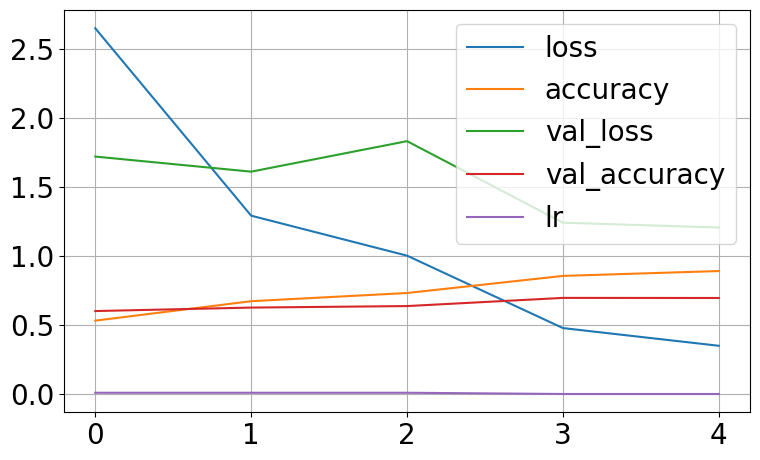

In [ ]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_before_unfreezing.pdf')
plt.show()

## Unfreezing the Pretrained Layers
In this section, we unfreeze the pretrained layers of the ResNet50 model to allow their weights to be updated during training. By unfreezing these layers, we enable the model to fine-tune its learned features to better suit our specific classification task.


In [ ]:
# For each layer in the pretrained model
for layer in pretrained_model.layers:
    # Unfreeze the layer
    layer.trainable = True

# Compiling the Model Again After Unfreezing:

In [ ]:
# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training - Post-Unfreezing Layers

In [ ]:
# Train, evaluate and save the best model
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/5
111/111 [==============================] - 126s 793ms/step - loss: 2.4166 - accuracy: 0.4124 - val_loss: 7.7680 - val_accuracy: 0.1921 - lr: 0.0010
Epoch 2/5
111/111 [==============================] - 86s 761ms/step - loss: 1.1719 - accuracy: 0.6280 - val_loss: 2.1689 - val_accuracy: 0.4590 - lr: 0.0010
Epoch 3/5
111/111 [==============================] - 86s 762ms/step - loss: 0.5840 - accuracy: 0.8142 - val_loss: 2.4696 - val_accuracy: 0.4259 - lr: 0.0010
Epoch 4/5
111/111 [==============================] - 109s 967ms/step - loss: 0.1660 - accuracy: 0.9595 - val_loss: 1.1033 - val_accuracy: 0.6663 - lr: 1.0000e-04
Epoch 5/5
111/111 [==============================] - 89s 784ms/step - loss: 0.0559 - accuracy: 0.9952 - val_loss: 1.0887 - val_accuracy: 0.6796 - lr: 1.0000e-04


# Plotting the learning curve

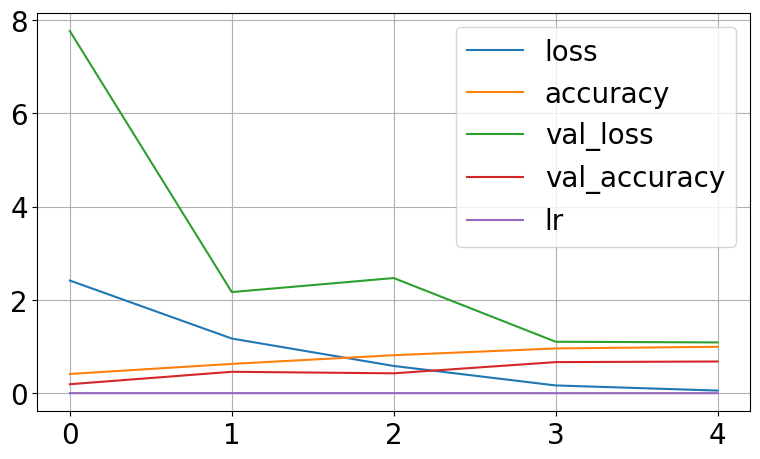

In [ ]:
# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Set grid
plt.grid(True)

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/result/figure/learning_curve_after_unfreezing.pdf')
plt.show()

# Testing:

Loading the saved model

In [ ]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/result/model/model.h5')

# Evaluating the model:

We first plot the loss:

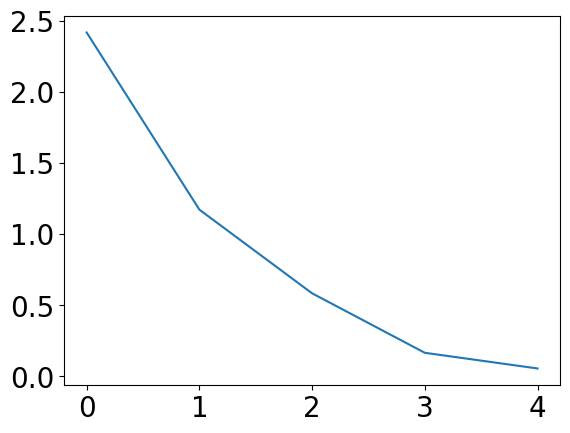

In [ ]:
losses = history.history["loss"]
plt.plot(losses)

Then print the accuracy:

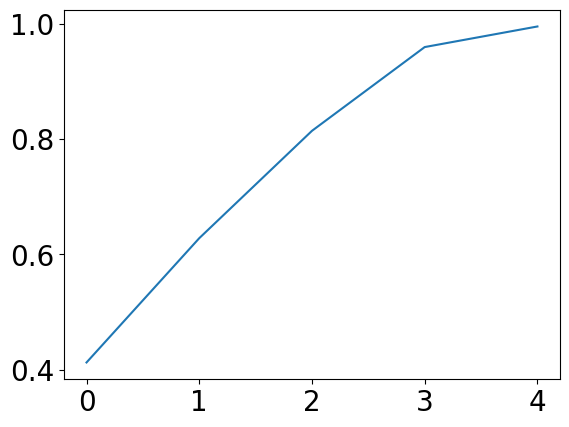

In [ ]:

acc = history.history['accuracy']
plt.plot(acc)

Our specific values for loss and accuracy are as follows:

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

40/40 [==============================] - 393s 10s/step - loss: 1.1369 - accuracy: 0.6675


Finally, we visualize a few of the misclassified images to see where the model was incorreclty predicting an image's activity

1/1 [==============================] - 0s 39ms/step


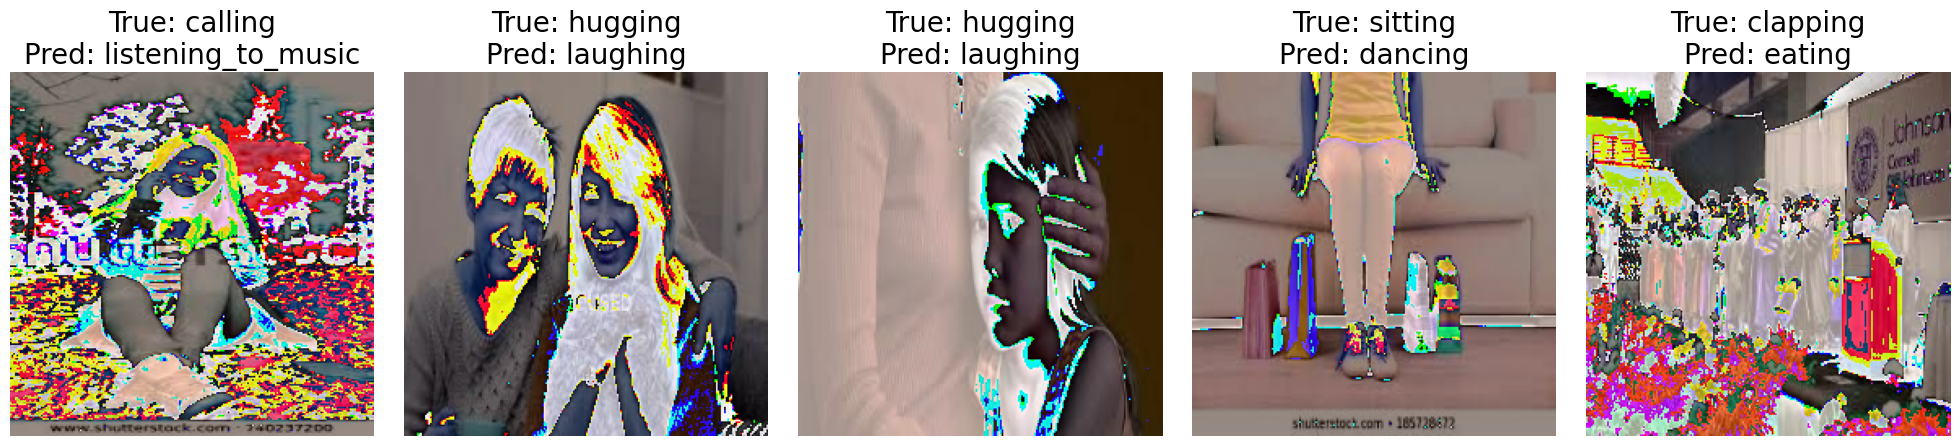

In [ ]:
# Reverse label_dict to get activity names from the numeric lables
inv_label_dict = {v: k for k, v in label_dict.items()}

all_images = []
all_true_labels = []
all_pred_labels = []

for images, labels in test_dataset:
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = labels.numpy()

    all_images.extend(images.numpy())  # Convert tensor image back to a numpy array
    all_true_labels.extend(true_labels)
    all_pred_labels.extend(predicted_labels)

all_images = np.array(all_images)
all_true_labels = np.array(all_true_labels)
all_pred_labels = np.array(all_pred_labels)

# Find indices of incorrectly predicted images
misclassified_indices = np.where(all_true_labels != all_pred_labels)[0]

# Display the misclassified images
num_images_to_show = 5
plt.figure(figsize=(20, 5))

for i, index in enumerate(misclassified_indices[:num_images_to_show]):
    plt.subplot(1, num_images_to_show, i + 1)
    image = all_images[index]
    true_label = inv_label_dict[all_true_labels[index]]
    pred_label = inv_label_dict[all_pred_labels[index]]
    plt.imshow(image.astype("uint8"))
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Limitations, Challenges, and Conclusion

This dataset only had labels for 15 activities. This does not include the scope for important and more nuanced fields like health-care and sports, where activities may need to be more specific and wide-ranging.

We also notice that our accuracy is 66.75%; this is likely because images can be multi-class in nature, but this dataset only allows for one label. A person could be sitting AND laughing, for example. Further research would need to be done on how to give multiple label predictions for each image. We additionally note that our model performs better than random guessing (50%).

Lastly, our largest challenge was with first dealing with unsupervised data. The reader may have noticed that the linked Kaggle data source actually has two datasets, one for training and testing. However, the testing dataset was not labeled, making it an unsupervised problem. We came up with a separate Colab notebook to try and tackle this type of dataset. However, we wanted to show more concrete results on how our model was performing, so we considered the training set as our entire dataset, splitting this single file into testing, validation, and training subsets.

Quasi-validation results included predicting the accuracies for each pair of classes (15 Choose 2 = 105 comparisons). As we know from the statistics realm, such pairwise comparisons may not be valid, as we do not include a family correction rate (analogously as we would use the Bonferroni correction to redefine our alpha-value for these pairs or a Post-Hoc Tukey's test after achieving statistically significant ANOVA results). While we would get a general idea about how well the model was performing (in fact, accompanied by an intuitive visual), we were unsure of the statistical validity of such analysis.

We also considered creating a t-SNE scatterplot for the 15 classes, which again would have produced a tangible visual about how the unsupervised model was performing, even if we could not attach a specific accuracy score to it. However, our scope of knowledge for t-SNE was too limited to complete within the project's deadline. We'd be very interested to implement such an analysis with a little more time.

We acknowledge that our training set has been reduced to 80% of what it could have been had we completed our unsupervised dataset code. Even so, we had over 10,000 images to train our model, so we are in the realm of "big data" - certainly enough for mathematical concepts like central limit theorem. We hope that our analysis provides enough insights on training a supervised CNN model with hopes to expand on our unsupervised model's analysis.

# Presentation Link:

https://www.canva.com/design/DAGD2QiVqzM/v24ojqZNeaBeEOh1r0_UfA/view?utm_content=DAGD2QiVqzM&utm_campaign=designshare&utm_medium=link&utm_source=editor


# References

Code Acknowledgement: Most of the code in this assignment submission has been copied and modified from Professor James Huang's (GWU) Machine Learning I class. The specific case study can be found here: https://github.com/yuxiaohuang/teaching/blob/main/machine_learning_I/spring_2024/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s3_convolutional_neural_networks/case_study/case_study.ipynb
Professor Huang's code was largely by inspired by this code source: Géron, A., 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media. Our official references section is as follows:

* “Data Sprint 76 - Human Activity Recognition.” AI Planet (Formerly DPhi), aiplanet.com/challenges/233/data-sprint-76-human-activity-recognition-233/overview/about.
* Géron, A., 2019. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems. O'Reilly Media.
* Huang, Yuxiao. 2024. Popular Machine Learning Methods: Idea, Practice and Math Part 3, Chapter 2, Section 3: Convolutional Neural Networks Case Study: CIFAR-10 Dataset. George Washington University. GitHub: https://github.com/yuxiaohuang.
* Nagadia, Meet. “Human Action Recognition (HAR) Dataset.” Kaggle, 2 June 2022, www.kaggle.com/datasets/meetnagadia/human-action-recognition-har-dataset/data.
